<a href="https://colab.research.google.com/github/TitusChoi/AI/blob/master/Concept/NLP/NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP.ipynb
Description   : Natural Language Processing<br>

In [1]:
# konlpy 패키지가 존재하지 않는다면 설치하고 사용
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 460kB 49.4MB/s 
     |████████████████████████████████| 92kB 13.7MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


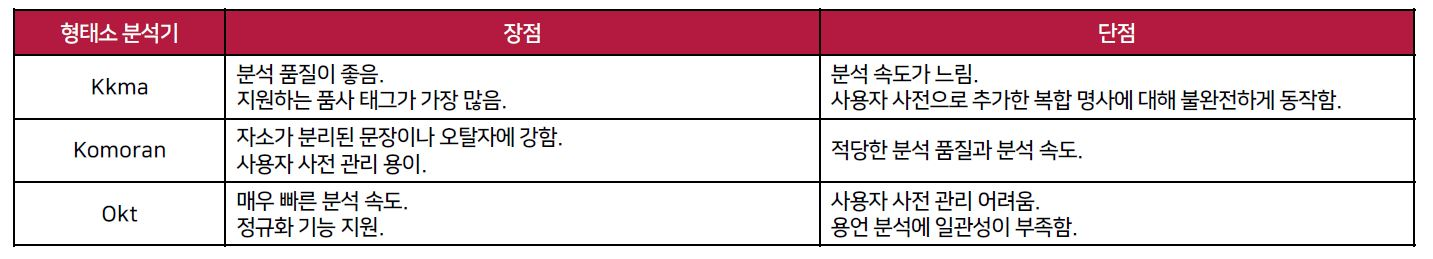

# 1. Kkma 형태소 분석기

In [3]:
from konlpy.tag import Kkma
# 형태소 분석기 객체 생성

kkma = Kkma()

text = "아버지가 방에 들어갑니다."

In [4]:
# 형태소 추출
morphs = kkma.morphs(text)
print(morphs)

['아버지', '가', '방', '에', '들어가', 'ㅂ니다', '.']


In [5]:
# 형태소와 품사 태그 추출
pos = kkma.pos(text)
print(pos)

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [6]:
# 명사만 추출
nouns = kkma.nouns(text)
print(nouns)

['아버지', '방']


In [7]:
# 문장 분리
sentences = "국내 코스피가 3000선을 돌파하였습니다. 이번 해는 정말 기대가 되네요!"
s = kkma.sentences(sentences)
print(s)

['국내 코스 피가 3000 선을 돌파하였습니다.', '이번 해는 정말 기대가 되네요!']


# 2. Komoran 형태소 분석기

In [8]:
from konlpy.tag import Komoran

#  코모란 형태소 분석기 객체 생성
komoran = Komoran()
text = "거인의 어깨 위에 올라서라."

In [9]:
# 형태소 추출
komoran_morphs = komoran.morphs(text)
print(komoran_morphs)

['거인', '의', '어깨', '위', '에', '올라서', '라', '.']


In [10]:
# 형태소와 품사 태그 추출
komoran_pos = komoran.pos(text)
print(komoran_pos)

[('거인', 'NNP'), ('의', 'JKG'), ('어깨', 'NNP'), ('위', 'NNG'), ('에', 'JKB'), ('올라서', 'VV'), ('라', 'EF'), ('.', 'SF')]


In [11]:
# 명사만 추출
komoran_nouns = komoran.nouns(text)
print(komoran_nouns)

['거인', '어깨', '위']


# 3. Okt 형태소 분석기

In [12]:
from konlpy.tag import Okt
okt = Okt()

# 형태소 추출
text = '인공지능을 배우는 채널'
okt_morphs = okt.morphs(text)
print(okt_morphs)

['인공', '지능', '을', '배우는', '채널']


In [13]:
# 형태소와 품사 태그 추출
okt_pos = okt.pos(text)
print(okt_pos)

[('인공', 'Noun'), ('지능', 'Noun'), ('을', 'Josa'), ('배우는', 'Verb'), ('채널', 'Noun')]


In [14]:
# 명사만 추출
nouns = okt.nouns(text)
print(nouns)

['인공', '지능', '채널']


In [15]:
# 정규화 한 뒤 어구 추출
text = "체스 한판 하실래욬ㅋㅋ?, 사랑햌ㅋㅋㅋㅋ, 안됑ㅋㅋㅋㅋ"
print(okt.normalize(text))
print(okt.phrases(text))

체스 한판 하실래요ㅋㅋ?, 사랑해ㅋㅋㅋ, 안됑ㅋㅋㅋ
['체스', '체스 한판', '사랑햌', '안됑', '한판', '사랑']


# 4. 임베딩

In [16]:
from gensim.models import Word2Vec
from konlpy.tag import Komoran

# 데이터 읽어오는 함수
def read_review_data(filename):
  with open(filename, 'r') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]
  return data

# 리뷰 파일 읽어오기
print('1) 말뭉치 데이터 읽기 시작')
review_data = read_review_data('/content/drive/MyDrive/ratings.txt')
print(len(review_data))

1) 말뭉치 데이터 읽기 시작
200000


In [17]:
# 문장 단위로 명사만 추출해 학습 입력 데이터로 설정
print('2) 형태소에서 명사만 추출 시작')
komoran = Komoran()
docs = [komoran.nouns(sentence[1]) for sentence in review_data]

2) 형태소에서 명사만 추출 시작


In [18]:
# word2vec 모델 학습
print('3) word2vec 모델 학습 시작')
model = Word2Vec(sentences = docs, size = 200, window = 4, min_count = 2, sg = 1)

3) word2vec 모델 학습 시작


In [19]:
# word2vec 모델 저장
print('4) 학습된 모델 저장 시작')
model.save('/content/drive/MyDrive/nvmc.model')

4) 학습된 모델 저장 시작


In [20]:
# 학습된 말뭉치 개수, 코퍼스 내 전체 단어 개수
print('corpus_count : ', model.corpus_count)
print('corpus_total_words : ', model.corpus_total_words)

corpus_count :  200000
corpus_total_words :  1076896


In [21]:
# 모델 다시 로딩
model = Word2Vec.load('/content/drive/MyDrive/nvmc.model')
print('model.corpus_total_words:', model.corpus_total_words)

model.corpus_total_words: 1076896


In [22]:
# 사랑이란 단어로 생성한 단어 임베딩 벡터
print('사랑 : ', model.wv['사랑'])

사랑 :  [ 0.02103304  0.16413088 -0.19188143  0.02704491 -0.1118581  -0.40986213
  0.23628202  0.03980096  0.45573598  0.41330925  0.47332773 -0.16985169
 -0.19448563  0.07440516  0.052758   -0.23324421 -0.29287136  0.12540452
  0.02242605 -0.03123589 -0.1790066   0.28029937 -0.327947   -0.23821968
 -0.3462336  -0.13241307 -0.08156361  0.04267824  0.13842022 -0.20978096
  0.15229334  0.3333731   0.00219545  0.05181325 -0.10807676  0.15363835
  0.17794843 -0.1354519   0.36906084  0.08311887 -0.36743185  0.02650766
 -0.00754789  0.19832732 -0.12417038 -0.09036376  0.26101422 -0.3973933
  0.08574954 -0.20532608  0.12966014 -0.09585104 -0.04230748  0.36878833
  0.10847386 -0.1108497   0.2671759   0.00371114 -0.08112495  0.06327007
 -0.02374926 -0.0165803  -0.2771159  -0.6460963  -0.50568455 -0.37136665
 -0.22059377  0.27622056  0.09782235 -0.02891386  0.14562453  0.24825649
  0.27187577  0.18437718 -0.10108003 -0.29176226  0.08755834 -0.04034939
 -0.08912379 -0.07219768  0.29368213  0.297656

In [23]:
# 단어 유사도 계산
print('일요일 = 월요일\t', model.wv.similarity(w1 = '일요일', w2 = '월요일'))
print('김수현 = 배우\t', model.wv.similarity(w1 = '김수현', w2 = '김수현'))
print('대기업 = 현대\t', model.wv.similarity(w1 = '대기업', w2 = '현대'))
print('일요일 != 삼성\t', model.wv.similarity(w1 = '일요일', w2 = '삼성'))
print('히어로 != 현대\t', model.wv.similarity(w1 = '히어로', w2 = '현대'))

일요일 = 월요일	 0.9275893
김수현 = 배우	 1.0
대기업 = 현대	 0.70798445
일요일 != 삼성	 0.6356288
히어로 != 현대	 0.6668284


In [24]:
# 가장 유사한 단어 목록 추출
print(model.wv.most_similar('김정민', topn = 5))
print(model.wv.most_similar('사랑', topn = 5))

[('카탈로그', 0.9882370233535767), ('파안', 0.9854121208190918), ('총신', 0.9832813739776611), ('미역', 0.9827509522438049), ('태양빛', 0.981722354888916)]
[('사랑은', 0.7274750471115112), ('사랑이란', 0.7142429351806641), ('이별', 0.7121278643608093), ('애정', 0.7087106108665466), ('치유', 0.7077416181564331)]


# 5. 텍스트 유사도 알고리즘
코사인 유사도를 활용한다. 벡터 A, B가 존재한다고 할 때 벡터 A, B에 대한 코사인 유사도는 아래와 같다.
$$cos\theta_{A,B} = \frac{A\cdot B}{\left| \left| A \right| \right| \left| \left| B \right| \right|} = \frac{\sum_{i=1}^{n}A_iB_i}{\sqrt{\sum_{i=1}^{n}A_i^2}\sqrt{\sum_{i=1}^{n}B_i^2}}$$

이 식을 활용하여 A, B의 코사인 유사도를 직접 계산하면 다음과 같다.
A : 6월에 뉴턴은 선생님의 제안으로 트리니티에 입학했다.
B : 6월에 뉴턴은 선생님의 제안으로 대학교에 입학했다.

$$A\cdot B = 1 + 1 + 1 + 1 + 0 + 1 + 0 = 5$$
$$\left| \left| A \right| \right| \left| \left| B \right| \right| = \sqrt{\sum_{i=1}^{n}A_i^2}\sqrt{\sum_{i=1}^{n}B_i^2} = \sqrt{1^2 + 1^2 + 1^2 + 1^2 + 1^2 + 1^2 + 0^2} \sqrt{1^2 + 1^2 + 1^2 + 1^2 + 0^2 + 1^2 + 1^2} = 6$$
$$\therefore cos\theta_{A,B} = \frac{A\cdot B}{\left| \left| A \right| \right| \left| \left| B \right| \right|} = \frac{5}{6}$$ 

In [25]:
from konlpy.tag import Komoran
import numpy as np
from numpy import dot
from numpy.linalg import norm

# 코사인 유사도 계산
def cos_sim(vec1, vec2):
  return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

def make_term_doc_mat(sentence_bow, word_dics):
  freq_mat = {}

  for word in word_dics:
    freq_mat[word] = 0
  
  for word in word_dics:
    if word in sentence_bow:
      freq_mat[word] += 1
    
  return freq_mat

# 단어 벡터 만들기
def make_vector(tdm):
  vec = []
  for key in tdm:
    vec.append(tdm[key])
  return vec

In [26]:
# 문장 정의
sentence1 = '6월에 뉴턴은 선생님의 제안으로 트리니티에 입학하였다'
sentence2 = '6월에 뉴턴은 선생님의 제안으로 대학교에 입학하였다'
sentence3 = '나는 맛있는 밥을 뉴턴 선생님과 함께 먹었습니다'

# 형태소분석기를 이용해 단어 묶음 리스트 생성
komoran = Komoran()
bow1 = komoran.nouns(sentence1)
bow2 = komoran.nouns(sentence2)
bow3 = komoran.nouns(sentence3)

# 단어 묶음 리스트를 하나로 합침 : 
bow = bow1 + bow2 + bow3

# 단어 묶음 중 중복 제거 후 단어 사전 구축
word_dics = []
for token in bow:
  if token not in word_dics:
    word_dics.append(token)

In [27]:
# 문장 별 단어 문서 행렬 계산
freq_list1 = make_term_doc_mat(bow1, word_dics)
freq_list2 = make_term_doc_mat(bow2, word_dics)
freq_list3 = make_term_doc_mat(bow3, word_dics)

print(freq_list1)
print(freq_list2)
print(freq_list3)

{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '트리니티': 1, '입학': 1, '대학교': 0, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 1, '뉴턴': 1, '선생님': 1, '제안': 1, '트리니티': 0, '입학': 1, '대학교': 1, '밥': 0, '선생': 0, '님과 함께': 0}
{'6월': 0, '뉴턴': 1, '선생님': 0, '제안': 0, '트리니티': 0, '입학': 0, '대학교': 0, '밥': 1, '선생': 1, '님과 함께': 1}


In [28]:
# 문장 벡터 생성
doc1 = np.array(make_vector(freq_list1))
doc2 = np.array(make_vector(freq_list2))
doc3 = np.array(make_vector(freq_list3))
# 코사인 유사도 계산
r1 = cos_sim(doc1, doc2)
r2 = cos_sim(doc3, doc1)
print(r1, r2)

0.8333333333333335 0.20412414523193154
